In [2]:
import scipy.misc
import os
import matplotlib.pyplot as plt
import numpy as np
import imageio
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.metrics import accuracy_score

In [3]:
from tabulate import tabulate
def plotTable(clms, clmDataHeadears, alignSize):
  data = []
  
  for i in range(len(clms[list(clms.keys())[0]])):
      dataElement = []
      for key in clms.keys():
          dataElement.append(clms[key][i])
      data.append(dataElement)
      
  print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                  colalign=["center"]*alignSize))

In [4]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            #face = scipy.misc.imread(os.path.join(root, file)) # Load image from a path
            face = imageio.imread(os.path.join(root, file))
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label


number of train data images is 154 and number of features for each image is 65536


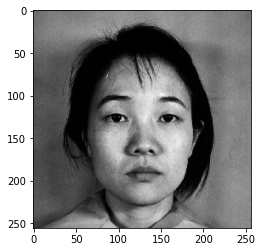

In [7]:
train_data , train_label = loadImages('/content/drive/MyDrive/ML_Hw4/Q8_Dataset/emotion detection dateset/train')
test_data , test_label = loadImages('/content/drive/MyDrive/ML_Hw4/Q8_Dataset/emotion detection dateset/test')

print("number of train data images is" , train_data.shape[0] , "and number of features for each image is", train_data.shape[1])

    ### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
plt.imshow(train_data[0].reshape(256,256) , cmap='gray')
plt.show()


In [8]:
pca = PCA(n_components=154)
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

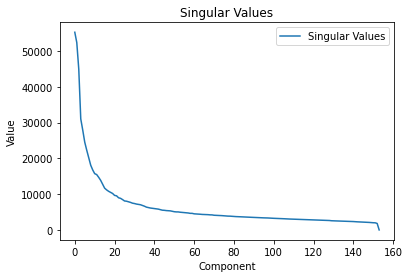

In [10]:
plt.plot(pca.singular_values_, label = 'Singular Values')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('Singular Values')
plt.legend()

0.8935137748850931


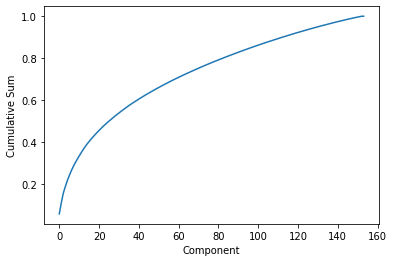

In [11]:
cum_sum_components = np.cumsum(pca.singular_values_/np.sum(pca.singular_values_))
plt.plot(cum_sum_components)
plt.xlabel('Component')
plt.ylabel('Cumulative Sum')
print(cum_sum_components[110])

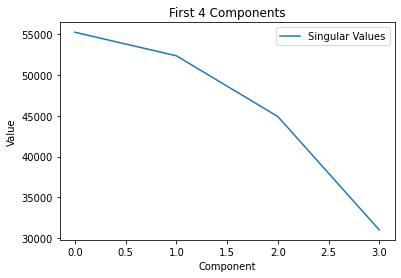

In [12]:
plt.plot(pca.singular_values_[0:4], label = 'Singular Values')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('First 4 Components')
plt.legend()

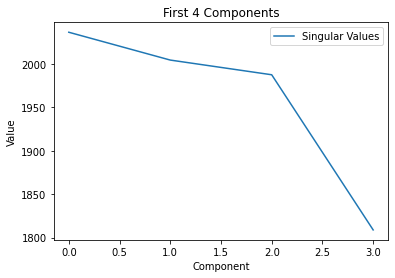

In [13]:
plt.plot(pca.singular_values_[149:153], label = 'Singular Values')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('First 4 Components')
plt.legend()

In [14]:
pca = PCA(n_components=110)
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=110, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_train_trans = pca.transform(train_data)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**Acc of KNN on PCA Transformed Data**

In [17]:
acc_pca = []
for k in range(1,3):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train_trans, train_label)
  x_test_trans = pca.transform(test_data)
  pred_label = neigh.predict(x_test_trans)
  aac1 = (accuracy_score(test_label, pred_label)*100)
  acc_pca.append(aac1)
  print("The accuracy of the model is: %.1f%%" % (accuracy_score(test_label, pred_label)*100))

The accuracy of the model is: 84.7%
The accuracy of the model is: 62.7%


**ACC of KNN on Original Dataset**

In [18]:
acc = []
for k in range(1,3):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(train_data, train_label)
  pred_label = neigh.predict(test_data)
  aac1 = (accuracy_score(test_label, pred_label)*100)
  acc.append(aac1)
  print("The accuracy of the model is: %.1f%%" % (accuracy_score(test_label, pred_label)*100))

The accuracy of the model is: 84.7%
The accuracy of the model is: 62.7%


In [19]:
r = 3
plotTable({1:["1NN ", "2NN"], 2:[acc_pca[0], acc_pca[1]],
           3:[acc[0], acc[1]]}, 
          ['With PCA Preprocess', 'No Preprocess'], 3)

╒═════╤═══════════════════════╤═════════════════╕
│     │  With PCA Preprocess  │  No Preprocess  │
╞═════╪═══════════════════════╪═════════════════╡
│ 1NN │        84.7458        │     84.7458     │
├─────┼───────────────────────┼─────────────────┤
│ 2NN │        62.7119        │     62.7119     │
╘═════╧═══════════════════════╧═════════════════╛
